In [7]:
import pandas as pd

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/Qasper 8-70b/qasper_8b_100.csv"
df = pd.read_csv(path)

In [10]:
df

,question,correct_answer,context,answer_8b,Rouge1,Rouge2,RougeL,Bleu,Chrf,Chrfplus,...,Bart,BEM,Prometheus,Consistency,TSim,Faithfullness,Relevancy,Correctness,RSim,LLM
0,What is the seed lexicon?,A vocabulary of positive and negative predicat...,The seed lexicon consists of positive and nega...,A lexicon of positive and negative predicates.,0.545455,0.380952,0.545455,23.287897,64.041014,62.646120,...,0.276982,0.591087,3,0.500000,4.0,NaN,0.967307,0.732141,0.928566,0.8
1,What are the results?,Using all data to train: AL -- BiGRU achieved ...,FLOAT SELECTED: Table 3: Performance of variou...,Tables 3 and 4.,0.000000,0.000000,0.000000,0.259022,2.191987,2.099373,...,0.020035,0.088408,1,1.000000,0.0,1.0,0.801184,0.554433,0.717730,0.8
2,How are relations used to propagate polarity?,"Based on the relation between events, the sugg...","In this paper, we propose a simple and effecti...",Through discourse relations like Cause and Con...,0.000000,0.000000,0.000000,1.646664,23.155087,18.514909,...,0.001475,0.067522,4,1.000000,2.0,1.0,0.922401,0.701070,0.804278,0.9
3,How are relations used to propagate polarity?,Cause relation: both events in the relation sh...,"In this paper, we propose a simple and effecti...",Through discourse relations of Cause and Conce...,0.095238,0.000000,0.095238,1.958225,35.610802,28.987514,...,0.016717,0.873740,3,0.500000,2.0,0.0,0.922401,0.812904,0.851592,0.8
4,How big is the Japanese data?,7000000 pairs of events were extracted from th...,"As a raw corpus, we used a Japanese web corpus...",100 million sentences.,0.000000,0.000000,0.000000,1.646664,11.711215,10.386993,...,0.007404,0.050920,1,1.000000,1.0,0.0,0.759328,0.200358,0.801434,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,What is task success rate achieved?,96-97.6% using the objects color or shape and ...,"To test our model, we generated 500 new scenar...",97.6% and 96.0%.,0.250000,0.000000,0.250000,5.751392,20.110667,20.574182,...,0.017336,0.654545,4,1.000000,2.0,1.0,0.842237,0.717040,0.868161,0.8
96,How is performance of this system measured?,Using the BLEU score as a quantitative metric ...,We use the BLEU BIBREF30 metric on the validat...,Human evaluation and BLEU score.,0.444444,0.125000,0.222222,7.141816,57.003234,52.879991,...,0.092529,0.522352,4,1.000000,5.0,0.5,0.842361,0.611357,0.945429,0.0
97,How big dataset is used for training this system?,"For the question generation model 15,000 image...","We use MS COCO, Bing and Flickr datasets from ...","385,777 utterances and 15,000 images with 75,0...",0.461538,0.320000,0.461538,21.084455,60.449678,58.580884,...,0.087274,0.685281,3,0.666667,4.0,0.0,0.865779,0.605114,0.920455,1.0
98,How do they obtain word lattices from words?,By considering words as vertices and generatin...,"Word Lattice\nAs shown in Figure FIGREF4 , a w...",They treat all possible substrings as vertexes.,0.095238,0.000000,0.095238,2.908318,21.843693,18.997212,...,0.009014,0.077913,3,1.000000,1.0,1.0,0.890694,0.578103,0.812411,0.0


In [11]:
df.columns

Index(['question', 'correct_answer', 'context', 'answer_8b', 'Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'Chrfplus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'Bart', 'BEM', 'Prometheus',
       'Consistency', 'TSim', 'Faithfullness', 'Relevancy', 'Correctness',
       'RSim', 'LLM'],
      dtype='object')

In [12]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'Chrfplus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
pearson_correlation_matrix = selected_columns_df.corr()
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

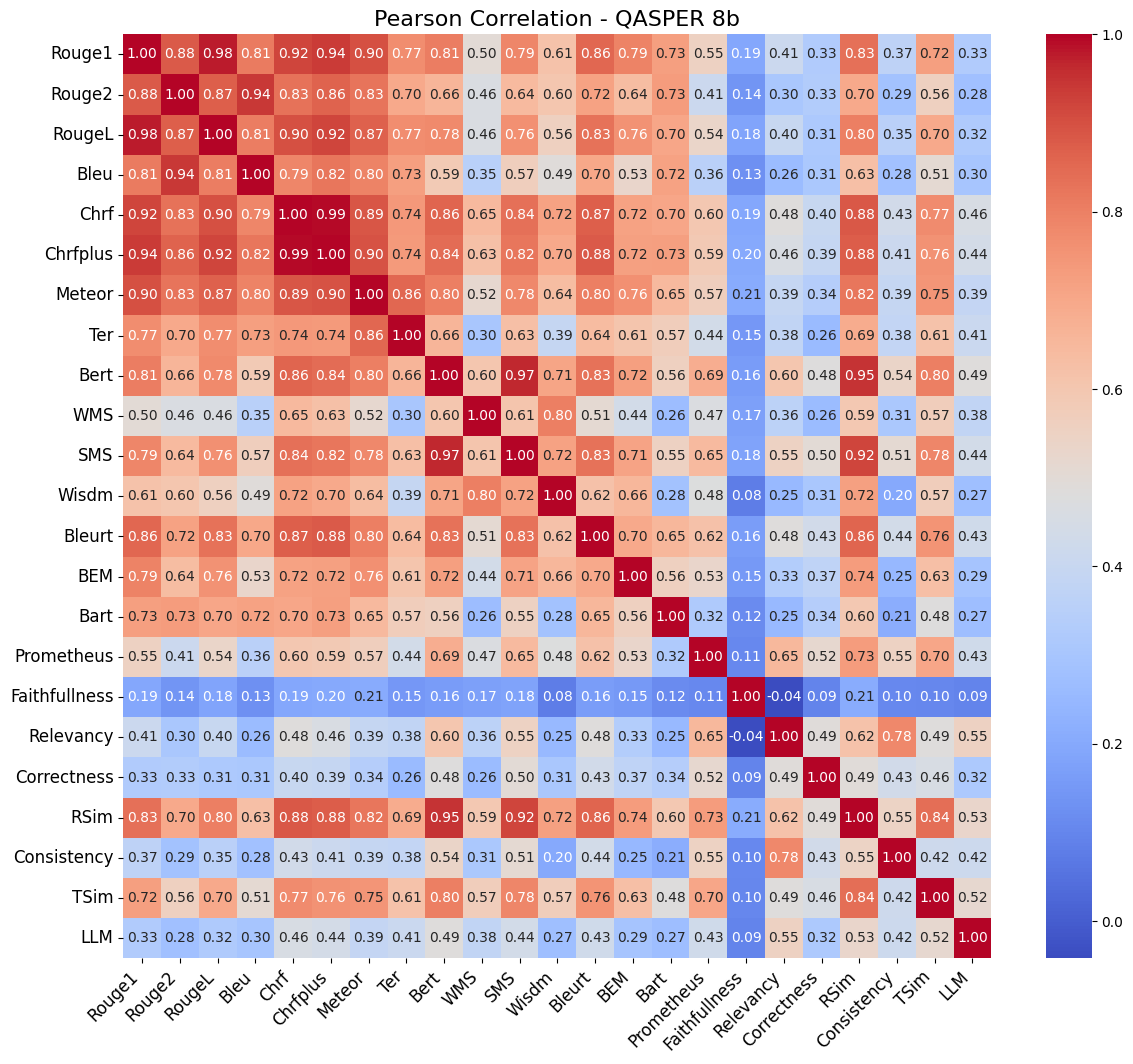

In [13]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Pearson Correlation - QASPER 8b', fontsize=16)  # Adjust title size
plt.show()

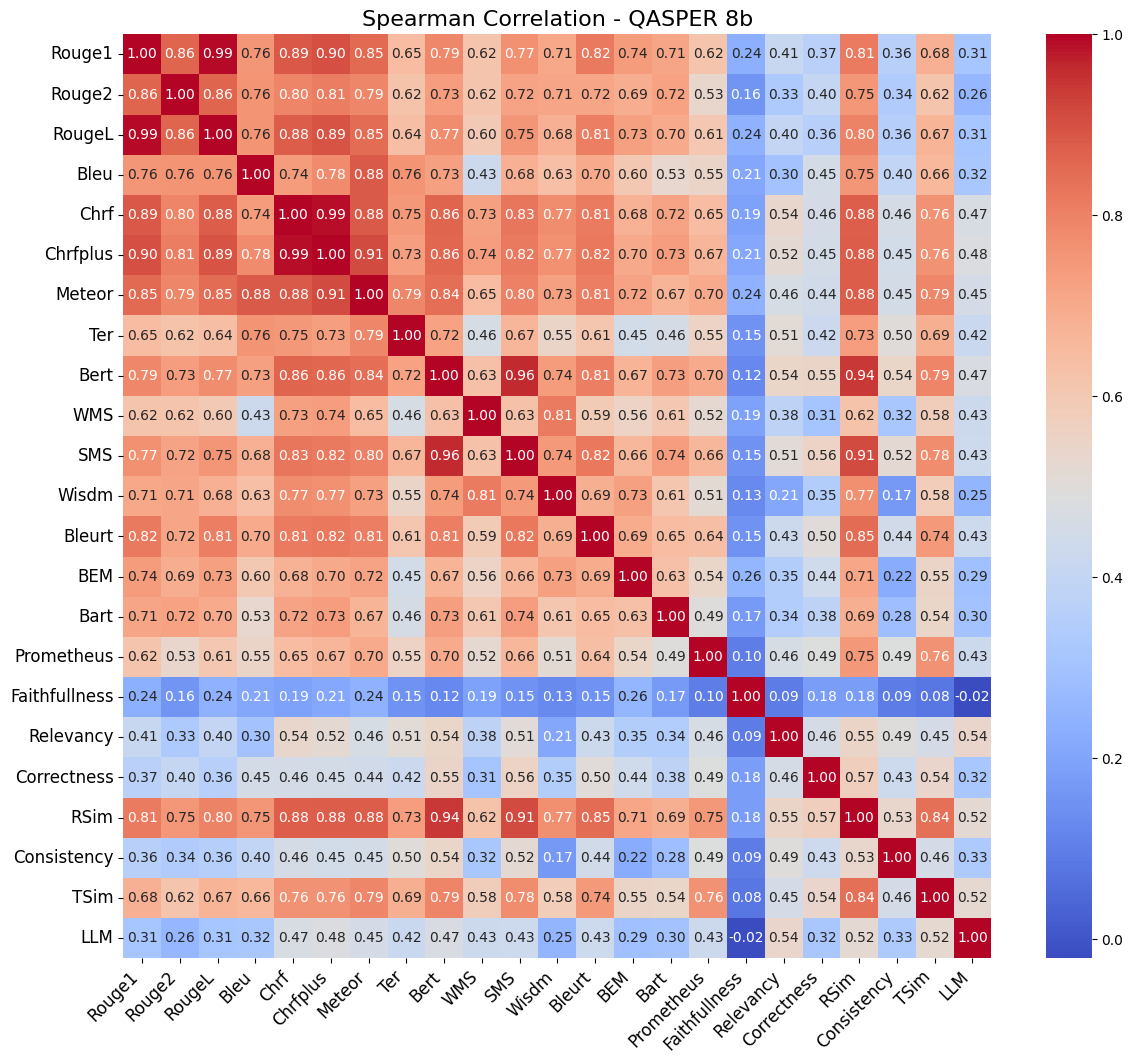

In [14]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Spearman Correlation - QASPER 8b', fontsize=16)  # Adjust title size
plt.show()